In [1]:
# melakukan import library yang digunakan
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!pip install kneed
!pip install xlrd
!pip install imblearn

In [2]:
# memasukkan data dari excel ke dalam DataFrame
df = pd.read_csv("Dataset_Terapi_Kelenjar_Getah_Bening.csv")
df.head(5)

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0


# Melakukan Data Preprocessing

In [3]:
df.isnull().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

**Terdapat data NaN**. Karena itu, diperlukan untuk mengisi data tersebut.
Namun, data NaN ini tidak dapat diisi menggunakan metode konvensional seperti mengisi dengan nilai rata-rata karena merupakan dataset medis

<AxesSubplot:>

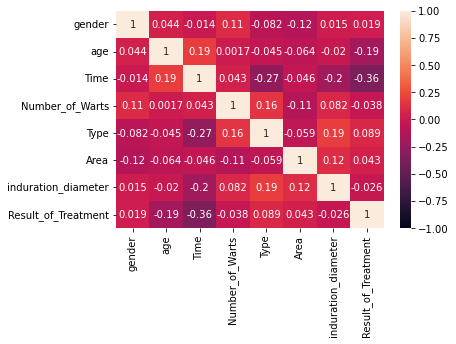

In [4]:
import seaborn as sns
sns.heatmap(data= df.corr(), vmin = -1, vmax = 1, annot = True)

Dengan menganalisa korelasi, data NaN dapat di-isi dengan nilai modus yang relevan. Namun, pada dataset ini, **tidak terdapat korelasi yang kuat antar kolom** sehingga pengisian dengan nilai modus tidak dapat dilakukan. Data NaN akan diisi dengan menggunakan metode KNN. Library KNNImputer akan digunakan.

In [5]:
# melakukan import
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# mengisi data NULL dengan metode KNN
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

In [6]:
df_imputed.head()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1.0,15.0,11.00,6.0,1.0,30.0,25.0,0.0
1,1.0,27.0,11.75,2.6,1.0,208.0,6.0,0.0
2,1.0,32.0,12.00,9.0,1.0,43.0,50.0,0.0
3,1.0,33.0,1.75,7.0,2.0,379.0,7.0,0.0
4,1.0,34.0,5.00,7.0,3.0,64.0,7.0,0.0


In [7]:
df_imputed.isnull().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

In [8]:
print("Jumlah data duplikat =", len(df_imputed)-len(df_imputed.drop_duplicates()))

Jumlah data duplikat = 0


**Data preprocessing telah berhasil dilakukan** dengan mengisi data yang kosong dan memastikan tidak adanya baris data yang duplikat pada dataset.

# Exploratory Data Analysis

In [9]:
df_imputed.describe()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.544444,31.044444,7.226111,6.084444,1.746667,95.700000,14.446667,0.788889
std,0.500811,12.235435,3.106510,4.223953,0.807159,136.614643,17.188919,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,5.500000,1.700000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,9.937500,8.750000,2.000000,80.750000,9.600000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


In [10]:
df_imputed.groupby('Result_of_Treatment')['age'].count()

Result_of_Treatment
0.0    19
1.0    71
Name: age, dtype: int64

**Jumlah data "Resulf of Treatment" tidak seimbang** dengan jumlah treatment yang tidak berhasil sebanyak 19 dan 71 treatment berhasil. 

Padahal menurut Kumar, 2020:
> Most machine learning algorithms work best when the number of samples in each class are about equal.

Karena itu, **diperlukan jumlah sample yang seimbang**. Dalam mengolah dataset Imbalance ini, metode under-sampling atau over-sampling tidak akan digunakan. 

Karena metode under-sampling mengurangi data dalam dataset secara random
sehingga 1 dan 0 memiliki jumlah yang sama.
Sedangkan metode over-sampling mengisi data yang lebih sedikit dengan
data random sehingga 1 dan 0 memiliki jumlah yang sama.

# Handling Imbalance
Metode yang akan digunakan adalah Synthetic Minority Oversampling Technique (SMOTE). Data sintesis yang di-gerenate akan relevan karena bukan merupakan data random.
> This technique generates synthetic data for the minority class.

In [11]:
# melakukan import library
from imblearn.over_sampling import SMOTE

# memisahkan predictor dan target predictor
x = df_imputed.iloc[:,:-1]
y = df_imputed.iloc[:,-1]

#melakukan imbalance handling
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

Result_of_Treatment
0.0    71
1.0    71
dtype: int64


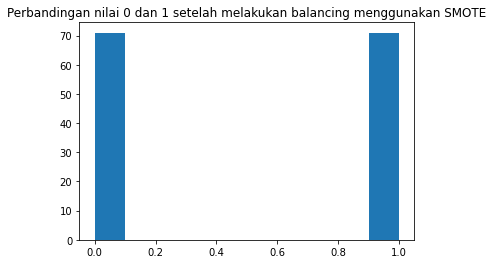

In [12]:
#Memastikan imbalance telah di handle dengan baik
df_counter = pd.DataFrame(y_smote, columns = ['Result_of_Treatment'])

plt.hist(df_counter['Result_of_Treatment'])
plt.title("Perbandingan nilai 0 dan 1 setelah melakukan balancing menggunakan SMOTE")
print(df_counter.groupby('Result_of_Treatment').size())

# Classification

Classification akan dilakukan dengan Logistic Regression, K-Nearest Neighbour dan Naive Bayes.

Salah satu kasus penyakit kelenjar getah bening yang akan diklasifikasikan dan diprediksi apakah perawatannya akan berhasil adalah sebagai berikut:
* Gender: Laki-laki
* Age	: 21
* Time 	: 9.75
* Number of Warts	: 5
* Type	: 1
* Area	: 101
* Induration Diameter: 6

### **Regression: Logistic Regression**

In [13]:
# Melakukan split dataset menjadi data train dan data test berdasarkan Paretto Principle (membagi data menjadi 80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

# Melakukan scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [14]:
# Melakukan logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [15]:
# Melakukan uji prediksi menggunakan data test pada model yang diciptakan menggunakan data train
y_pred = classifier.predict(X_test)
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


In [16]:
# Menampilkan Confusion Matrix and Accuracy Score

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[ 1  1]
 [ 1 15]]
Accuracy Score:  0.8888888888888888


### **K-Nearest Neighbour**

Nilai akurasi tertinggi adalah : 0.9444444444444444 pada nilai K = 3


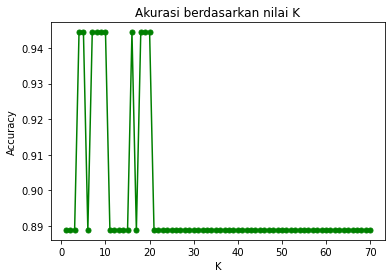

In [17]:
# Mencari nilai K dengan akurasi tertinggi

from sklearn.neighbors import KNeighborsClassifier

accuracy = []

from sklearn import metrics
for i in range(1,71):
    knn_accuracy_counter = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_pred_accuracy_counter = knn_accuracy_counter.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred_accuracy_counter))
    
plt.plot(range(1,71),accuracy,color = 'green', marker='o', markersize=5)
plt.title('Akurasi berdasarkan nilai K')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Nilai akurasi tertinggi adalah :",max(accuracy),"pada nilai K =",accuracy.index(max(accuracy)))

Error Rate terkecil adalah: 0.05555555555555555 pada nilai K = 3


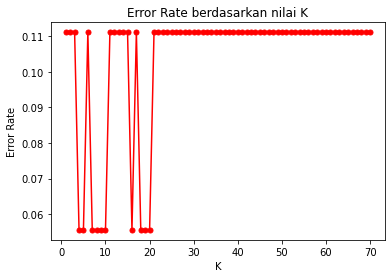

In [18]:
# Mencari nilai K dengan error rate terendah

error_rate = []

for i in range(1,71):
    knn_error_counter = KNeighborsClassifier(n_neighbors=i)
    knn_error_counter.fit(X_train,y_train)
    y_pred_error_counter = knn_error_counter.predict(X_test)
    error_rate.append(np.mean(y_pred_error_counter != y_test))

plt.plot(range(1,71),error_rate,color='red', marker='o', markersize=5)
plt.title('Error Rate berdasarkan nilai K')
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Error Rate terkecil adalah:",min(error_rate),"pada nilai K =",error_rate.index(min(error_rate)))

In [19]:
# Melakukan KNN dengan K = 3
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [20]:
# Melakukan uji prediksi menggunakan data test pada model yang diciptakan menggunakan data train
y_pred = knn.predict(X_test)
print(y_pred)

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


In [21]:
# Menampilkan Confusion Matrix and Accuracy Score
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm2)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[ 1  1]
 [ 1 15]]
Accuracy Score:  0.8888888888888888


### **Naive Bayes**

In [22]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nbmodel = nb.fit(X_train, y_train)

In [23]:
# Melakukan uji prediksi menggunakan data test pada model yang diciptakan menggunakan data train
y_pred = nbmodel.predict(X_test)
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


In [24]:
# Menampilkan Confusion Matrix and Accuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score

cm3 = confusion_matrix(y_test, y_pred)

print("Confusion Matrix\n", cm3)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[ 1  1]
 [ 0 16]]
Accuracy Score:  0.9444444444444444


Berikut adalah **hasil dari proses Classification** yang terdiri atas Logistic Regression, KNN, dan Naive Bayes. Naive Bayes memiliki nilai akurasi tertinggi sebesar 0.95 dan Logistic Regression serta KNN memiliki nilai akurasi sebesar 0.89.

Kreteria kasus yang diprediksi adalah sebagai berikut:
* Gender: Laki-laki
* Age	: 21
* Time 	: 9.75
* Number of Warts	: 5
* Type	: 1
* Area	: 101
* Induration Diameter: 6

In [25]:
print("Hasil prediksi kasus menggunakan Logistic Regression", classifier.predict([[1,21,9.75,5,1,101,6]]))
print("Hasil prediksi kasus menggunakan KNN", knn.predict([[1,21,9.75,5,1,101,6]]))
print("Hasil prediksi kasus menggunakan Naive Bayes", nbmodel.predict([[1,21,9.75,5,1,101,6]]))

Hasil prediksi kasus menggunakan Logistic Regression [0.]
Hasil prediksi kasus menggunakan KNN [1.]
Hasil prediksi kasus menggunakan Naive Bayes [1.]


# Clustering

Clustering dilakukan dengan menggunakan **K-Means**

In [26]:
#Mengatasi warning Memory Leak saat menggunakan K-Means

import warnings
warnings.filterwarnings('ignore')

In [27]:
from sklearn.cluster import KMeans

# Mencari nilai K yang terbaik
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_imputed)
    sse.append(kmeans.inertia_)
    
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")


print("Nilai K terbaik: ",kl.elbow)

Nilai K terbaik:  3


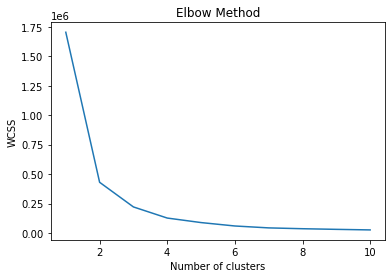

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_imputed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
# Clustering K-Means dilakukan dengan menggunakan nilai K = 3

kmeans = KMeans(n_clusters=3,random_state=1)

In [30]:
# Memasukkan hasil Clustering ke dalam dataset baru

kmeans_pred = kmeans.fit_predict(df_imputed)

dfsummary = pd.DataFrame()
dfsummary = df_imputed.copy()

dfsummary["Cluster"] = kmeans_pred
dfsummary.sample(7)

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment,Cluster
43,1.0,38.0,5.70,8.0,2.0,56.0,45.0,1.0,0
28,1.0,22.0,1.25,3.0,3.0,47.0,3.0,1.0,0
49,1.0,51.0,8.75,2.0,2.0,57.0,3.0,1.0,0
89,2.0,53.0,7.25,6.0,1.6,81.0,7.0,1.0,0
40,1.0,35.0,9.75,2.0,2.0,8.0,6.0,1.0,0
19,1.0,15.0,4.00,4.0,3.0,25.0,9.8,1.0,0
68,2.0,24.0,4.75,10.0,3.0,30.0,45.0,1.0,0


Berikut adalah **hasil dari proses Clustering** yang menampilkan nilai rata-rata dari "Age", "Time", "Number of Warts", "Area", dan "Induration diameter" serta nilai modus dari "Gender", "Type", dan "Result of Treatment" berdasarkan clusternya masing-masing.

In [31]:
dfsummaryfix = pd.DataFrame()
dfsummaryfix[["age", "Time","Number_of_Warts","Area","induration_diameter"]] = dfsummary[["age","Time","Number_of_Warts","induration_diameter","Cluster","Area"]].groupby(['Cluster']).mean()
dfsummaryfix[["gender","Type","Result_of_Treatment"]]= dfsummary[["gender","Type","Result_of_Treatment","Cluster"]].groupby(['Cluster']).agg(lambda x:x.value_counts().index[0])
dfsummaryfix["Count"] = dfsummary.groupby(['Cluster'])['Cluster'].count()
dfsummaryfix.head()

,age,Time,Number_of_Warts,Area,induration_diameter,gender,Type,Result_of_Treatment,Count
Cluster,,,,,,,,,
0,31.060976,7.251220,6.117073,14.490244,58.560976,2.0,1.0,1.0,82
1,33.142857,7.535714,6.285714,6.000000,415.857143,1.0,1.0,1.0,7
2,15.000000,3.000000,2.000000,70.000000,900.000000,1.0,3.0,1.0,1


### Reference
https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87

https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/